In [30]:
from sklearn.datasets import load_digits
from sklearn.semi_supervised import LabelSpreading
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

In [6]:
data=load_digits()
x=data.data
y=data.target

In [21]:
model=LogisticRegression()
num=int(len(x)*0.1)

In [22]:
model.fit(x[:num],y[:num])

D:\anocada\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_predict=model.predict(x[num:])
y_true=y[num:]

In [24]:
accuracy_score(y_predict,y_true)

0.8152039555006181

In [27]:
y_train=np.copy(y)

In [28]:
y_train[num:]=-1

In [41]:
model=LabelSpreading(gamma=0.1,max_iter=10)

In [42]:
model.fit(x,y_train)

LabelSpreading(alpha=0.2, gamma=0.1, kernel='rbf', max_iter=10, n_jobs=None,
               n_neighbors=7, tol=0.001)

In [43]:
predict_y=model.predict(x[num:])

In [44]:
accuracy_score(predict_y,y_true)

0.915327564894932

In [45]:
import pandas as pd
from sklearn.cluster import KMeans


D:\anocada\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [46]:
data=pd.read_csv('C:/Users/zhouwei/Desktop/L3/cluster/Mall_Customers.csv')

In [47]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
model1=MinMaxScaler()
model2=LabelEncoder()
data.Gender=model2.fit_transform(data.Gender)

In [66]:
train_data=data[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']]

In [67]:
train=model1.fit_transform(train_data)

In [68]:
model3=KMeans(n_clusters=4)

In [69]:
df=pd.DataFrame(model3.fit_predict(train))

In [74]:
pd.concat((df,train_data),axis=1).rename({0:'聚类'},axis=1)

,聚类,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,1,19,15,39
1,0,1,21,15,81
2,1,0,20,16,6
3,2,0,23,16,77
4,2,0,31,17,40
...,...,...,...,...,...
195,2,0,35,120,79
196,1,0,45,126,28
197,0,1,32,126,74
198,3,1,32,137,18


In [85]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import complete,dendrogram


In [84]:
model=AgglomerativeClustering(n_clusters=4,linkage='complete')
model.fit_predict(train)

array([0, 0, 1, 3, 1, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 0, 1, 0, 2, 3, 2, 0,
       1, 0, 1, 0, 1, 0, 1, 3, 2, 3, 2, 0, 1, 3, 1, 3, 1, 3, 1, 0, 2, 1,
       1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 0,
       1, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 1, 2, 0, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2,
       2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 3, 2, 0, 2, 0, 2, 0,
       1, 3, 0, 3, 1, 0, 0, 3, 1, 0, 1, 3, 0, 0, 2, 3, 1, 0, 0, 0, 1, 3,
       1, 3, 0, 3, 0, 3, 1, 3, 0, 3, 2, 3, 0, 3, 1, 0, 0, 0, 0, 0, 1, 3,
       2, 0, 2, 0, 1, 3, 2, 3, 1, 0, 1, 0, 1, 3, 1, 3, 0, 3, 1, 3, 1, 0,
       0, 0], dtype=int64)

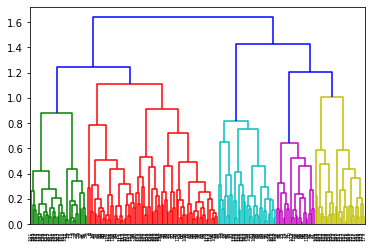

In [86]:
from matplotlib import pyplot as plt
plt.show(dendrogram(complete(train)))